In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kaggle
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

/Users/sanjayk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
x = np.array([2,3,4,5,6,1.3,9.2])

#help(PolynomialFeatures)
Logistic Regession :
    Y = m1*x1 + m2*x2 + m3*x3  + c        where x1, x2, and x3 non correlated variables
For Non Linear Equation
    Y = m1*x1 + m2*x1**2 + m3*x1**3 + m4*x1**4  + c        where x1, x2, and x3 non correlated variables

In [3]:
poly = PolynomialFeatures(4, include_bias=False)
poly.fit_transform(x.reshape(-1,1))

array([[2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 1.6000000e+01],
       [3.0000000e+00, 9.0000000e+00, 2.7000000e+01, 8.1000000e+01],
       [4.0000000e+00, 1.6000000e+01, 6.4000000e+01, 2.5600000e+02],
       [5.0000000e+00, 2.5000000e+01, 1.2500000e+02, 6.2500000e+02],
       [6.0000000e+00, 3.6000000e+01, 2.1600000e+02, 1.2960000e+03],
       [1.3000000e+00, 1.6900000e+00, 2.1970000e+00, 2.8561000e+00],
       [9.2000000e+00, 8.4640000e+01, 7.7868800e+02, 7.1639296e+03]])

In [4]:
clf1 = make_pipeline(PolynomialFeatures(3,include_bias=False), LinearRegression())
clf1

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [5]:
clf2 = Pipeline([('PolyNomial with 3 degree', PolynomialFeatures(3,include_bias=False)), ('Linear Regression', LinearRegression())])
clf2

Pipeline(steps=[('PolyNomial with 3 degree',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Linear Regression', LinearRegression())])

In [6]:
rng = np.random.RandomState(42)
x = 10* rng.rand(50)  # Normal distribution 
y = np.sin(x) + 0.15 * rng.randn(50)

In [7]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [8]:
y

array([-0.4570117 , -0.05656677,  0.84340931, -0.33743636,  0.77816542,
        0.8919645 ,  0.47962731,  0.84967311, -0.2171496 ,  0.45118433,
        0.25300693, -0.32865531,  0.78982847,  0.94291684,  1.12418926,
        1.1052417 , -0.02687488, -0.90656108, -0.87409826,  0.37362889,
       -0.23578948,  0.95672799,  0.05242202, -0.67806812, -0.86663837,
        1.20343354,  0.89984861, -0.7584544 , -0.29712985,  0.35121156,
       -0.15203654,  1.22168137,  0.60022314,  0.17066298, -0.62244077,
        1.09695363,  0.10836713,  0.78381541,  0.54422568, -1.25020497,
        0.9062799 , -0.91791825,  0.55883147,  0.24779111,  0.40464291,
        0.26014374,  0.16178976, -0.83382309, -0.80793166,  1.03866541])

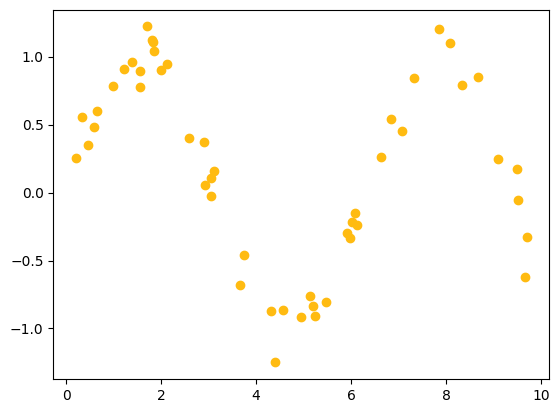

In [9]:
plt.scatter(x,y,color='#ffbb11', label='General Function of Sin Function')

In [23]:
clf1 = make_pipeline(PolynomialFeatures(6, include_bias=False), LinearRegression())
clf1 = clf1.fit(x.reshape(-1,1),y) 

In [24]:
x1 = np.linspace(-0.5,10.5, 200)   # generated 200 samples new fit
y1 = clf1.predict(x1.reshape(-1,1)) # y1 : model.predict

Text(0, 0.5, 'Y Sin Function')

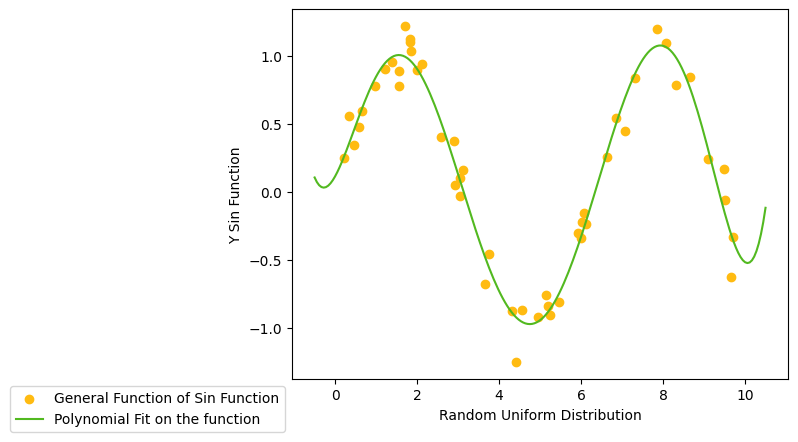

In [25]:
plt.scatter(x,y,color='#ffbb11', label='General Function of Sin Function')
plt.plot(x1,y1,color='#52b920', label='Polynomial Fit on the function')
plt.legend(loc="best",bbox_to_anchor=(0.0, 0, 0, 0))
plt.xlabel('Random Uniform Distribution')
plt.ylabel('Y Sin Function')

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
class GaussianFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    def _gauss_basis(self,x,y,width,axis=None): # Private function _
        arg =  (x-y)/width        
        return np.exp(-0.5*  np.sum(arg**2,axis))
    

    def fit(self,X,y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N) # N data point betwween xmin and xmax
        self.width_ =  self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)

Text(0, 0.5, 'Y Sin Function')

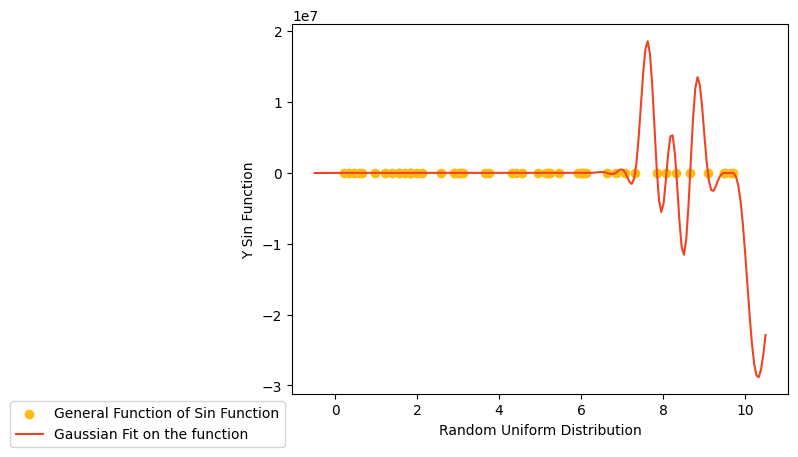

In [27]:
clf2 = make_pipeline(GaussianFeatures(50), LinearRegression())
clf2 = clf2.fit(x.reshape(-1,1),y)
x2 = np.linspace(-0.5,10.5, 200)   # generated 200 samples new fit
y2 = clf2.predict(x2.reshape(-1,1)) # y1 : model.predict
plt.scatter(x,y,color='#ffbb11', label='General Function of Sin Function')
plt.plot(x2,y2,color='#ef4423', label='Gaussian Fit on the function')
plt.legend(loc="best",bbox_to_anchor=(0.0, 0, 0, 0))
plt.xlabel('Random Uniform Distribution')
plt.ylabel('Y Sin Function')

### UnderFitting - High Bias- Rigid/ OverFitting - High Variance - Flexible
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/